# Exploratory Data Analysis

In [2]:
from data import *

# get all data return as x list and y list and emotion list - before normalisation
meed_files = get_meed_files()
dance_db_files = get_dance_db_files()
processed_data_MEED = preprocess_data(meed_files, 'MEED')
processed_data_danceDB = preprocess_data(dance_db_files, 'DanceDB')
processed_data = {key: processed_data_MEED[key] + processed_data_danceDB[key] for key in processed_data_MEED}

100%|██████████| 4102/4102 [00:23<00:00, 173.14it/s]


Validating interpolation...
No errors found!


4102it [00:02, 2033.15it/s]
4102it [00:01, 2087.36it/s]
100%|██████████| 109/109 [00:10<00:00, 10.39it/s]


Validating interpolation...
No errors found!


109it [00:00, 236.68it/s]
109it [00:00, 246.74it/s]


In [4]:
# visualise the data - after interpolation before normalisation

import matplotlib.pyplot as plt

x_list = processed_data['x']
y_list = processed_data['y']
emotion_vectors = processed_data['emotions']
# emotion_list = processed_data['emotion']

flat_x_list = [item for sublist in x_list for item in sublist]
flat_y_list = [item for sublist in y_list for item in sublist]
flat_emotion_vectors = [item for sublist in emotion_vectors for item in sublist]



In [6]:
keypointsMapping = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                        'L-Elb', 'L-Wr', 'MidHip', 'R-Hip', 'R-Knee', 'R-Ank', 
                        'L-Hip', 'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 
                        'L-Ear', 'L-BigToe', 'L-SmallToe', 'L-Heel', 'R-BigToe', 
                        'R-SmallToe', 'R-Heel']

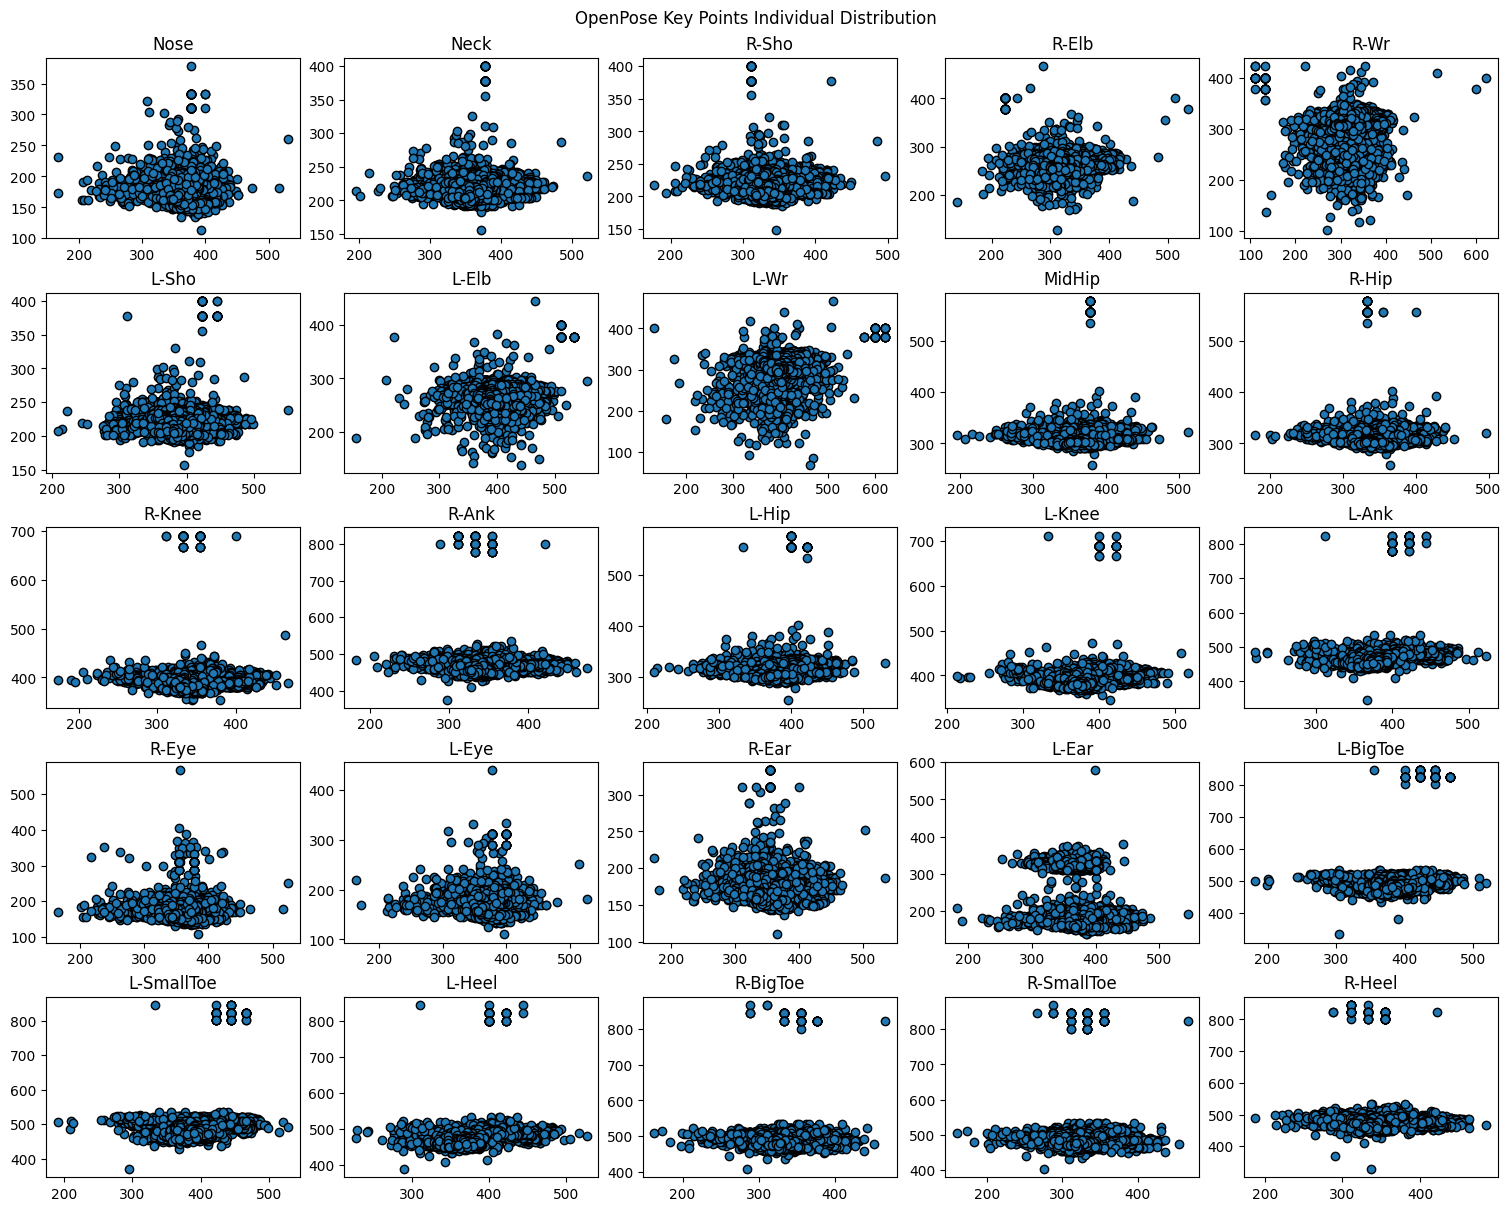

In [44]:
import matplotlib.pyplot as plt
# visualise the data - after interpolation before normalisation

# Assuming each sublist in x_list and y_list corresponds to one keypoint across all bodies
num_keypoints = len(keypointsMapping)
num_rows = 5  # Adjust based on the layout you prefer
num_cols = 5  # Adjust based on the layout you prefer

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12), constrained_layout=True)

for i in range(num_keypoints):
    row = i // num_cols
    col = i % num_cols
    # Extracting all the ith keypoints from each list
    keypoint_x = [body[i] for body in x_list if len(body) > i]
    keypoint_y = [body[i] for body in y_list if len(body) > i]
    axs[row, col].scatter(keypoint_x, keypoint_y,edgecolors='black')
    axs[row, col].set_title(keypointsMapping[i])

# Hide any unused subplots
for i in range(num_keypoints, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.suptitle('OpenPose Key Points Individual Distribution')
plt.show()

# x is x coord and y is y_coord


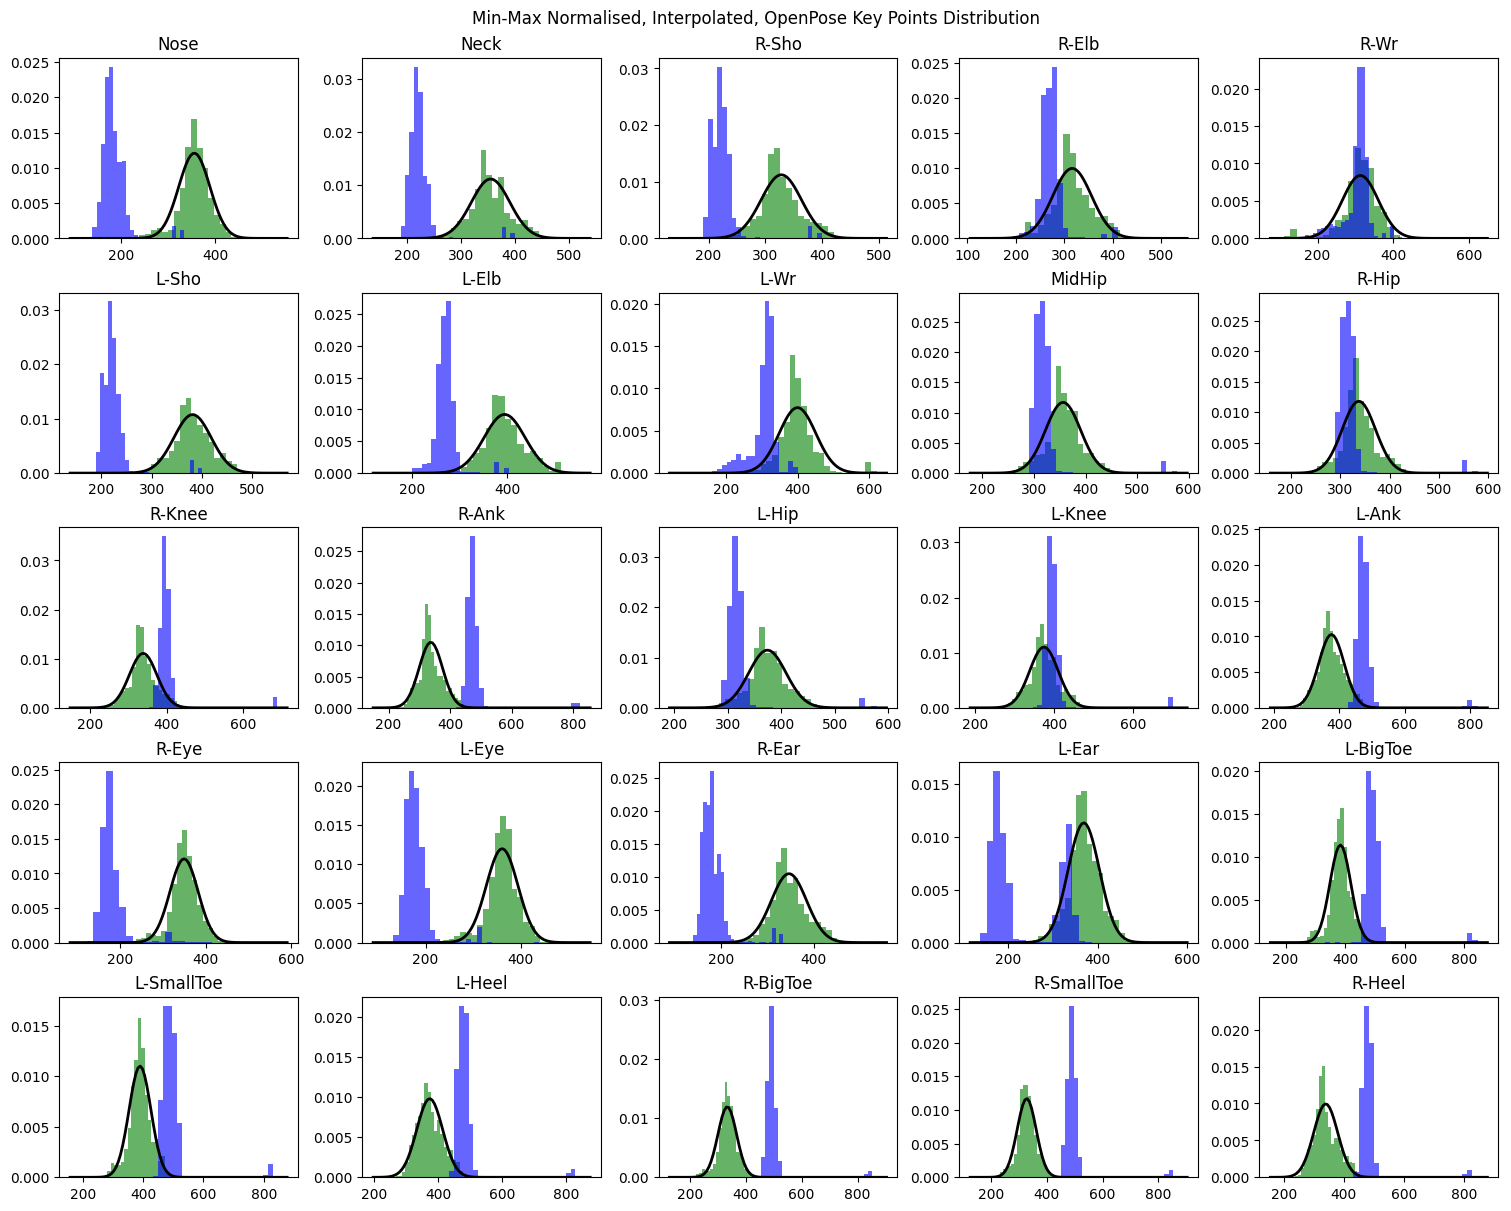

: 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming each sublist in x_list and y_list corresponds to one keypoint across all bodies
num_keypoints = len(keypointsMapping)
num_rows = 5  # Adjust based on the layout you prefer
num_cols = 5  # Adjust based on the layout you prefer

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12), constrained_layout=True)

for i in range(num_keypoints):
    row = i // num_cols
    col = i % num_cols
    # Extracting all the ith keypoints from each list
    keypoint_x = [body[i] for body in x_list if len(body) > i]
    keypoint_y = [body[i] for body in y_list if len(body) > i]

    # Plot histogram
    axs[row, col].hist(keypoint_x, bins=30, density=True, alpha=0.6, color='g')
    axs[row, col].hist(keypoint_y, bins=30, density=True, alpha=0.6, color='b')

    # Fit and plot a normal distribution
    xmin, xmax = axs[row, col].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(keypoint_x), np.std(keypoint_x))
    axs[row, col].plot(x, p, 'k', linewidth=2)
    
    title = f'{keypointsMapping[i]}'
    axs[row, col].set_title(title)

# Hide any unused subplots
for i in range(num_keypoints, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.suptitle('Min-Max Normalised, Interpolated, OpenPose Key Points Distribution')
plt.show()


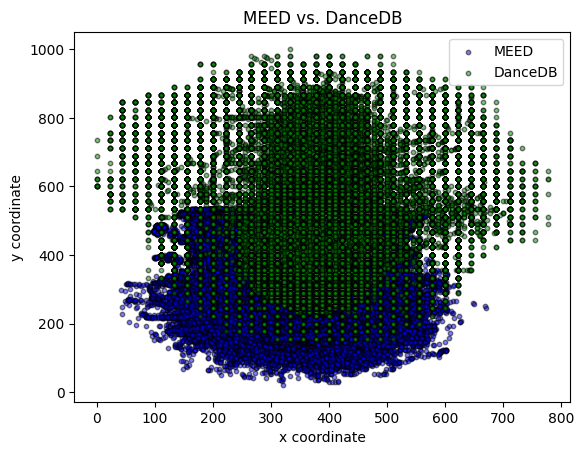

In [47]:

# visualise the data - after interpolation before normalisation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Split the data into MEED and DanceDB
num_meed = len(processed_data_MEED['x'])
x_list_meed = processed_data['x'][:num_meed]
y_list_meed = processed_data['y'][:num_meed]
x_list_danceDB = processed_data['x'][num_meed:]
y_list_danceDB = processed_data['y'][num_meed:]

# Flatten the lists for MEED and DanceDB
flat_x_list_meed = [item for sublist in x_list_meed for item in sublist]
flat_y_list_meed = [item for sublist in y_list_meed for item in sublist]
flat_x_list_danceDB = [item for sublist in x_list_danceDB for item in sublist]
flat_y_list_danceDB = [item for sublist in y_list_danceDB for item in sublist]

# Visualize MEED vs. DanceDB
plt.scatter(flat_x_list_meed, flat_y_list_meed, color='blue', label='MEED', alpha=0.5, edgecolors='black', s=10)
plt.scatter(flat_x_list_danceDB, flat_y_list_danceDB, color='green', label='DanceDB', alpha=0.5,edgecolors='black', s=10)
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.title('MEED vs. DanceDB')
plt.legend()
plt.show()


c:\Users\avika\anaconda3\envs\interactive_dance_thesis\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\avika\anaconda3\envs\interactive_dance_thesis\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\avika\anaconda3\envs\interactive_dance_thesis\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\avika\anaconda3\envs\interactive_dance_thesis\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\avika\anaco

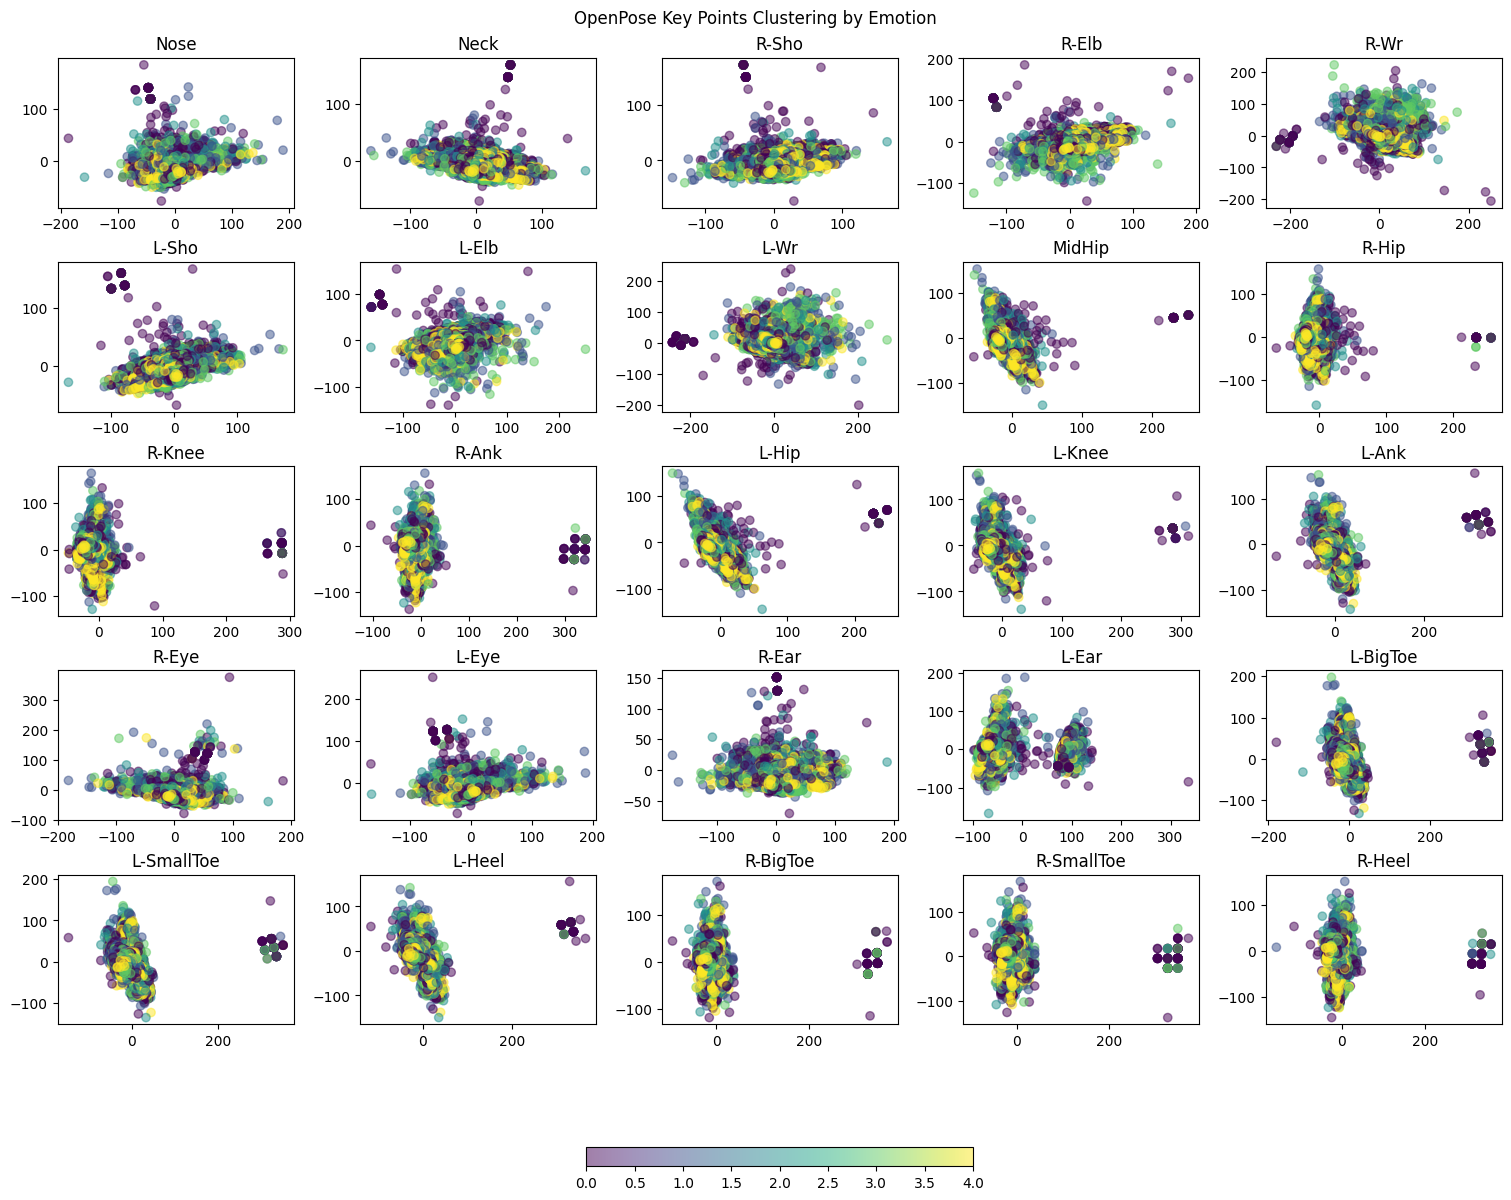

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Assuming 'x_list' and 'y_list' are lists of keypoints with shape [frames, keypoints]
# and 'emotion_vectors' contains the corresponding emotion labels for each frame

num_keypoints = len(keypointsMapping)
num_rows = 5  # Adjust based on the layout you prefer
num_cols = 5  # Adjust based on the layout you prefer

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12), constrained_layout=True)

# Define the cosine similarity function
def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

# For each keypoint, perform dimensionality reduction and clustering
for i in range(num_keypoints):
    row = i // num_cols
    col = i % num_cols
    # Extracting all the ith keypoints from each list
    keypoint_x = np.array([body[i] for body in x_list if len(body) > i])
    keypoint_y = np.array([body[i] for body in y_list if len(body) > i])
    keypoint_emotions = np.array(emotion_vectors)
    keypoint_coordinates = np.vstack((keypoint_x, keypoint_y)).T
    
    # Calculate the pairwise cosine distances (1 - cosine_similarity)
    cosine_distances = squareform(pdist(keypoint_emotions, lambda u, v: 1 - cosine_similarity(u, v)))

    # Perform clustering with Agglomerative Clustering using precomputed cosine distances
    clustering = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=5)
    clusters = clustering.fit_predict(cosine_distances)
    
    # Apply PCA to reduce to two dimensions for visualization
    pca = PCA(n_components=2)
    keypoints_reduced = pca.fit_transform(keypoint_coordinates)
    
    # Visualize the clusters with colors representing emotions
    scatter = axs[row, col].scatter(keypoints_reduced[:, 0], keypoints_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    
    # Set title for each subplot
    axs[row, col].set_title(keypointsMapping[i])

# Hide any unused subplots
for i in range(num_keypoints, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

# Add a color bar
fig.colorbar(scatter, ax=axs, orientation='horizontal', fraction=0.02, pad=0.1)

# Add a suptitle
plt.suptitle('OpenPose Key Points Clustering by Emotion')

# Display the plot
plt.show()


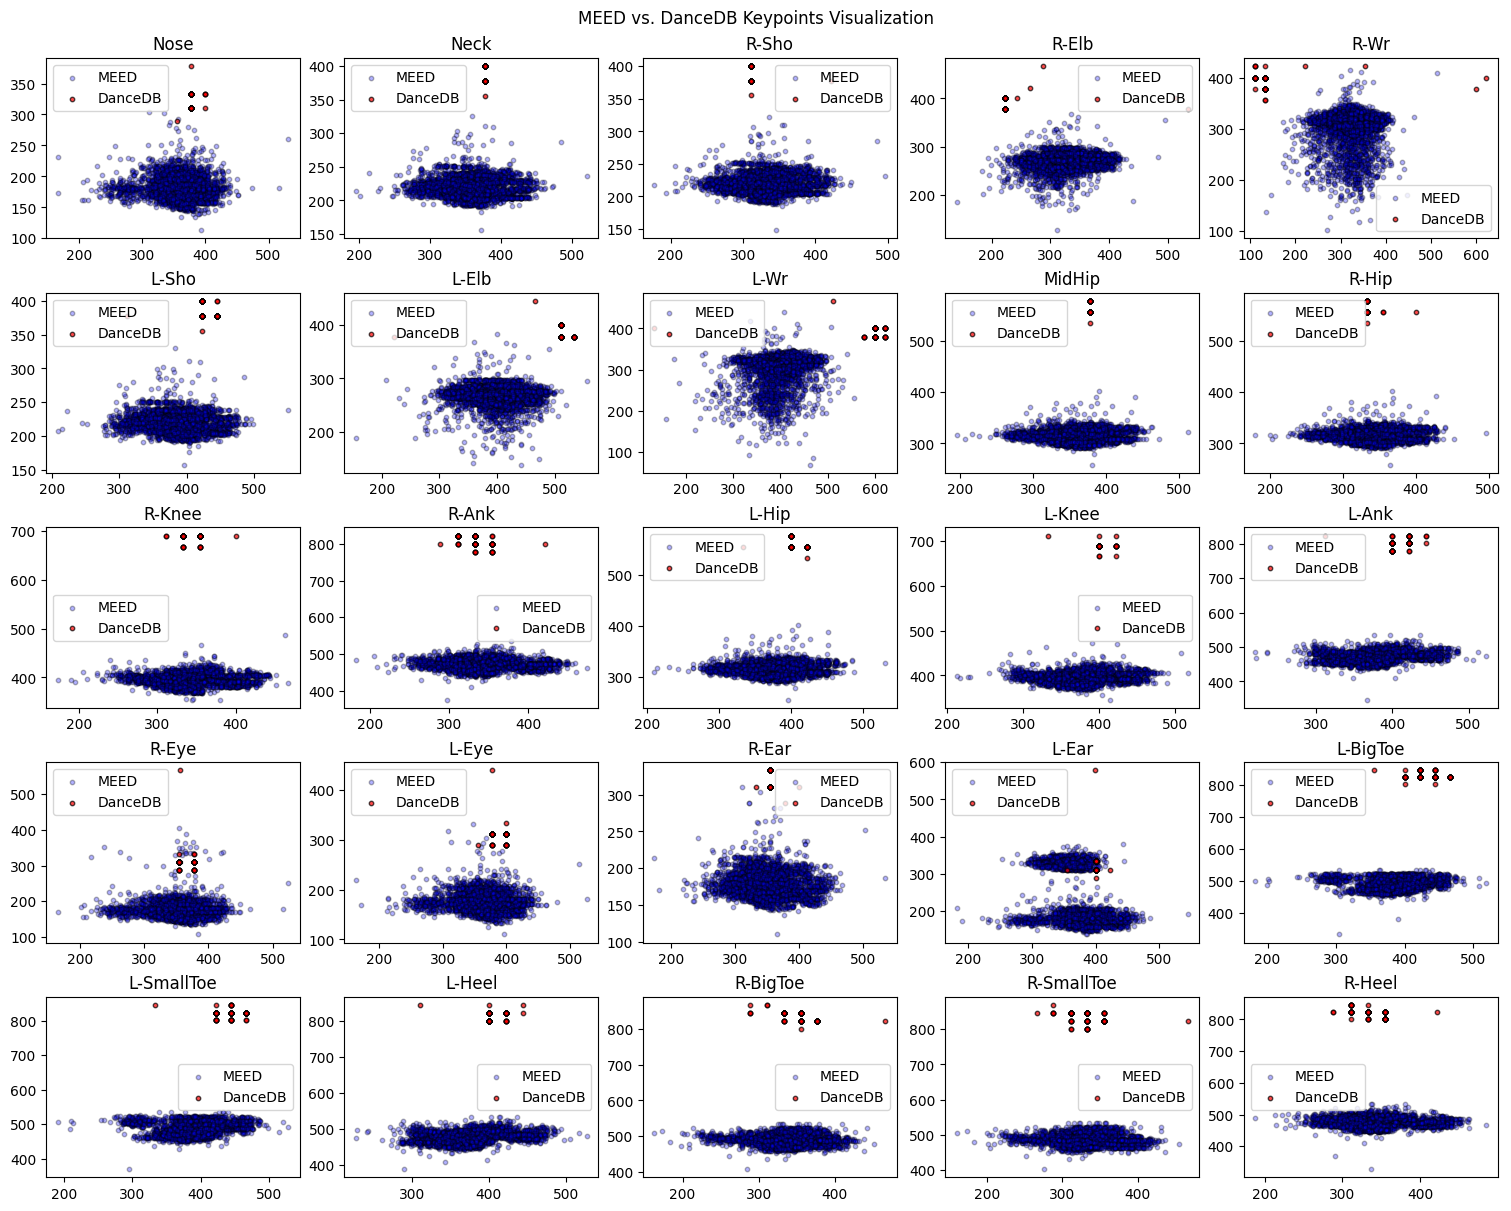

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Split the data into MEED and DanceDB
num_meed = len(processed_data_MEED['x'])
x_list_meed = processed_data['x'][:num_meed]
y_list_meed = processed_data['y'][:num_meed]
x_list_danceDB = processed_data['x'][num_meed:]
y_list_danceDB = processed_data['y'][num_meed:]

# Assuming you want to split keypoints into individual plots by index (like the emotion clustering example)
num_keypoints = 25  # or however many keypoints you have
num_rows = 5  # Adjust based on the layout you prefer
num_cols = 5  # Adjust based on the layout you prefer

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12), constrained_layout=True)

# For each keypoint index, plot MEED and DanceDB data
for i in range(num_keypoints):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    
    # Extracting all the ith keypoints from each list
    keypoint_x_meed = [body[i] for body in x_list_meed if len(body) > i]
    keypoint_y_meed = [body[i] for body in y_list_meed if len(body) > i]
    keypoint_x_danceDB = [body[i] for body in x_list_danceDB if len(body) > i]
    keypoint_y_danceDB = [body[i] for body in y_list_danceDB if len(body) > i]

    # Plot MEED data in blue
    ax.scatter(keypoint_x_meed, keypoint_y_meed, color='blue', label='MEED', alpha=0.3, edgecolors='black', s=10)

    # Plot DanceDB data in green
    ax.scatter(keypoint_x_danceDB, keypoint_y_danceDB, color='red', label='DanceDB', alpha=0.7, edgecolors='black', s=10)

    # Set title for each subplot with the keypoint index
    axs[row, col].set_title(keypointsMapping[i])
    ax.legend()

# Hide any unused subplots
for i in range(num_keypoints, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

# Add a suptitle
plt.suptitle('MEED vs. DanceDB Keypoints Visualization')

# Display the plot
plt.show()


# Analysing Latent Space

In [ ]:
from sklearn.decomposition import PCA
from model import main, parse_args
import argparse

# Define the arguments you want to pass
args = argparse.Namespace(
    BATCH_SIZE=8,
    BLOCK_SIZE=16,
    DROPOUT=0.3,
    LEARNING_RATE=0.0001,
    EPOCHS=300000,
    FRAMES_GENERATE=300,
    TRAIN=True,
    EVAL_EVERY=1000,
    CHECKPOINT_PATH="checkpoints/proto8_checkpoint.pth",
    
    L1_LAMBDA=None,
    L2_REG=0.0,
    FINETUNE=False,
    FINE_TUNING_LR=1e-5,
    FINE_TUNING_EPOCHS=100000,
    PENALTY=False,
    LATENT_VIS_EVERY=1000,
    
    # NOTES---------------------------------
    notes = f"""Proto8 - trying to adapt Pette et al 2019, addign latent visualisation and analysing latent space. Might be slow, maybe take this out when live.
    
    Also going to add MDN to increase variance of output as Bishop et al 1994. and Alemi et al 2017.
    
    Going to try train on just MEED data to see if result is better than adding dance data.

    All data, added 10% noise to emotions so model is less stuck. With LeakyRelu
    Loss = mse_loss(keypoints) + mse_loss(emotions) because before output emotions ( which feature was added to keypoint features) were not being matched to input emotions
    No penalty.

    Added dropout to keypoints, also changed input to emotion linear to x and not just emotion (emotion + keypoints)
    Taking extra dropout for emotions and keypoints out, because want model to rely on both equally so what's the point

    dropout keypoints and dropout emotion is currently equal but might change this.

    Emotions and keypoints are multimodal and added separately, but features are added in block processing using +.


    Got rid of both L1 and L2, increasing dropout because model acting weird, this is now delta + coord. 
    Delta is between next frame and current frame. So current frame is previous coord+previous delta. Last frame's delta is 0. 
    """
)

latent_space, train_seed = main(args)




In [2]:
latent_space.shape

(2400, 16, 512)

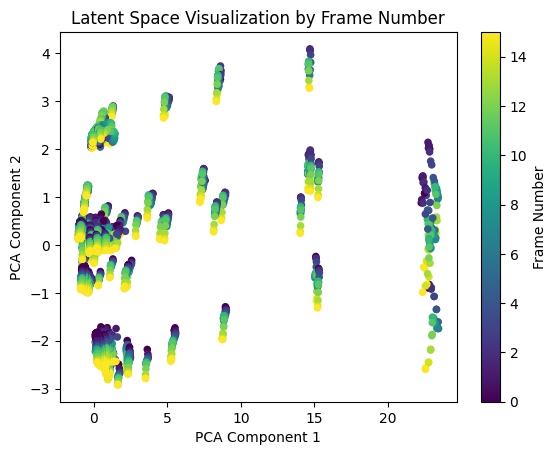

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# so 1-14 - shows that sequence draws path throughout latent space

# Assuming latent_space has shape (n_batches, n_frames_per_batch, n_features)
n_batches, n_frames_per_batch, n_features = latent_space.shape

# Flatten the latent space to 2D for PCA
latent_space_reshaped = latent_space.reshape(n_batches * n_frames_per_batch, n_features)

# Perform PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Create an array of frame numbers
# This assumes that frames within each batch follow a continuous sequence
frame_numbers = np.tile(np.arange(n_frames_per_batch), n_batches)

# Now plot the PCA-reduced data, coloring by frame number
plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=frame_numbers, cmap='viridis', s=20)
plt.colorbar(label='Frame Number')
plt.title('Latent Space Visualization by Frame Number')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


C:\Users\avika\AppData\Local\Temp\ipykernel_31060\4073392390.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, n_epoch_batches))


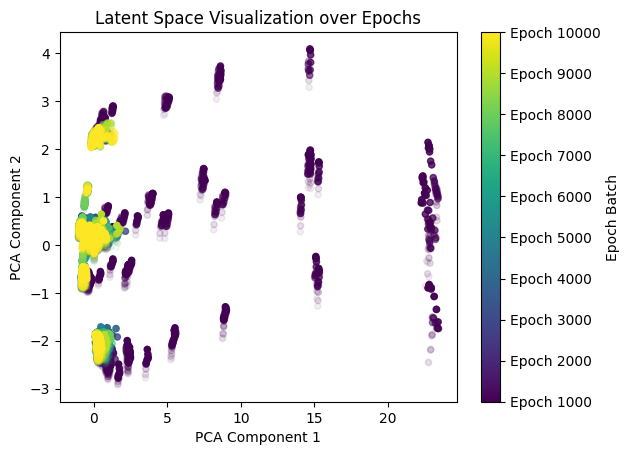

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Let's say latent_space is your (80, 16, 512) array
# Flatten the first two dimensions
n_epochs, n_time_steps, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_epochs * n_time_steps, n_features)

# Apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Create color mapping for epoch batches
n_epoch_batches = 10  # Adjust this if you have a different number of epoch batches
epoch_batch_colors = np.repeat(np.linspace(0, 1, n_epoch_batches), n_epochs / n_epoch_batches * n_time_steps)

# Create a graduated color mapping for time steps within the epoch batches
time_step_colors = np.tile(np.linspace(1, 0, n_time_steps), n_epochs)  # Dark to light for each time step

# Normalize the epoch batch colors to match the number of colors available in the colormap
sm = plt.cm.ScalarMappable(cmap='viridis', norm=Normalize(vmin=0, vmax=1))
sm.set_array([])

# Create the color for each point based on the epoch batch color and time step gradient
final_colors = sm.to_rgba(epoch_batch_colors)
final_colors[:, 3] = time_step_colors  # Set the alpha channel based on the time step gradient

# Plot the PCA-reduced data with color
scatter = plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=final_colors, s=20)

# Add a color bar for the epoch batches
cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, n_epoch_batches))
cbar.ax.set_yticklabels([f'Epoch {(i+1)*args.LATENT_VIS_EVERY}' for i in range(n_epoch_batches)])  # Set the tick labels as batch numbers
cbar.set_label('Epoch Batch')

# Set plot title and labels
plt.title('Latent Space Visualization over Epochs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


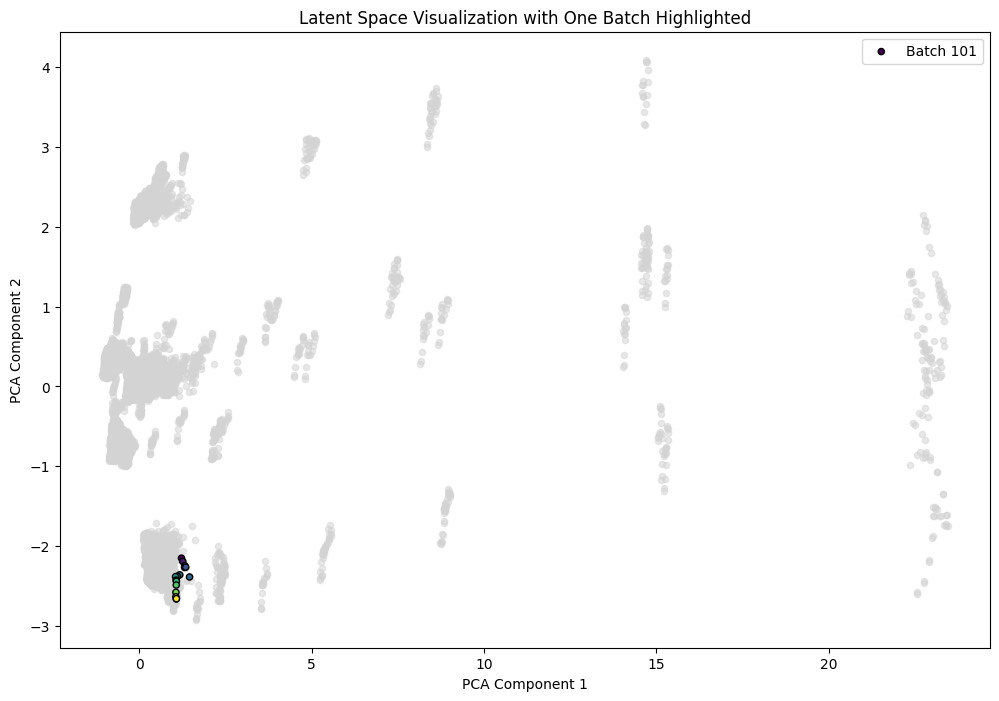

In [21]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Assume latent_space has shape (80, 16, 512)
# Flatten the first two dimensions
n_epochs, n_time_steps, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_epochs * n_time_steps, n_features)

# Apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Set the figure size to 12x8 inches (or any other size you prefer)
plt.figure(figsize=(12, 8))

# Plot all points with a neutral color
plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], color='lightgrey', s=20, alpha=0.5)

# Highlight one specific batch
highlight_batch_index = 100 # for example, highlight the 6th batch
highlight_start = highlight_batch_index * n_time_steps
highlight_end = (highlight_batch_index + 1) * n_time_steps

# Extract the points for the highlighted batch
highlighted_vectors = latent_vectors_2d[highlight_start:highlight_end, :]

# Create color mapping for the highlighted batch based on its time steps
highlighted_colors = viridis(np.linspace(0, 1, n_time_steps))

# Plot the highlighted batch with a color gradient
plt.scatter(highlighted_vectors[:, 0], highlighted_vectors[:, 1], c=highlighted_colors, s=20, edgecolor='black', label=f'Batch {highlight_batch_index+1}')

# Add legend to the plot
plt.legend()

# Set plot title and labels
plt.title('Latent Space Visualization with One Batch Highlighted')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()


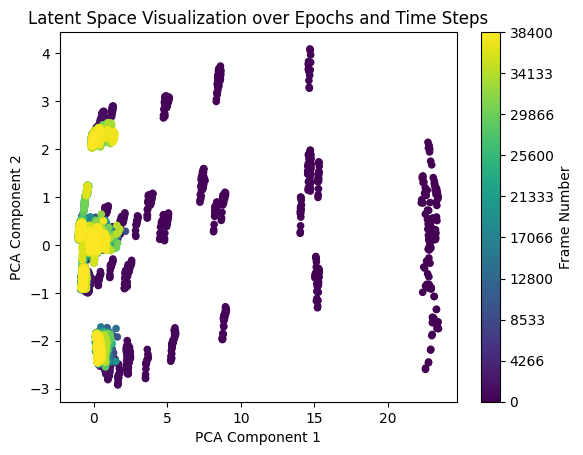

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Let's say latent_space is your (80, 16, 512) array
# Flatten the first two dimensions
n_epochs, n_time_steps, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_epochs * n_time_steps, n_features)
# each frame and batch treated separately, so each frame is just plot 1 by 1

# Apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Create normalized frame numbers for the color mapping
frame_numbers = np.linspace(0, 1, n_epochs * n_time_steps)

# Plot the PCA-reduced data, coloring by frame number
scatter = plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=frame_numbers, cmap='viridis', s=20)

# Create a color bar with labeled ticks
colorbar_ticks = np.linspace(0, 1, 10)  # 10 evenly spaced ticks from 0 to 1
colorbar_ticklabels = [f"{int(tick * (n_epochs * n_time_steps))}" for tick in colorbar_ticks]  # Scale ticks to frame numbers

cbar = plt.colorbar(scatter, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticklabels)
cbar.set_label('Frame Number')

# Set plot title and labels
plt.title('Latent Space Visualization over Epochs and Time Steps')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


c:\Users\avika\anaconda3\envs\interactive_dance_thesis\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


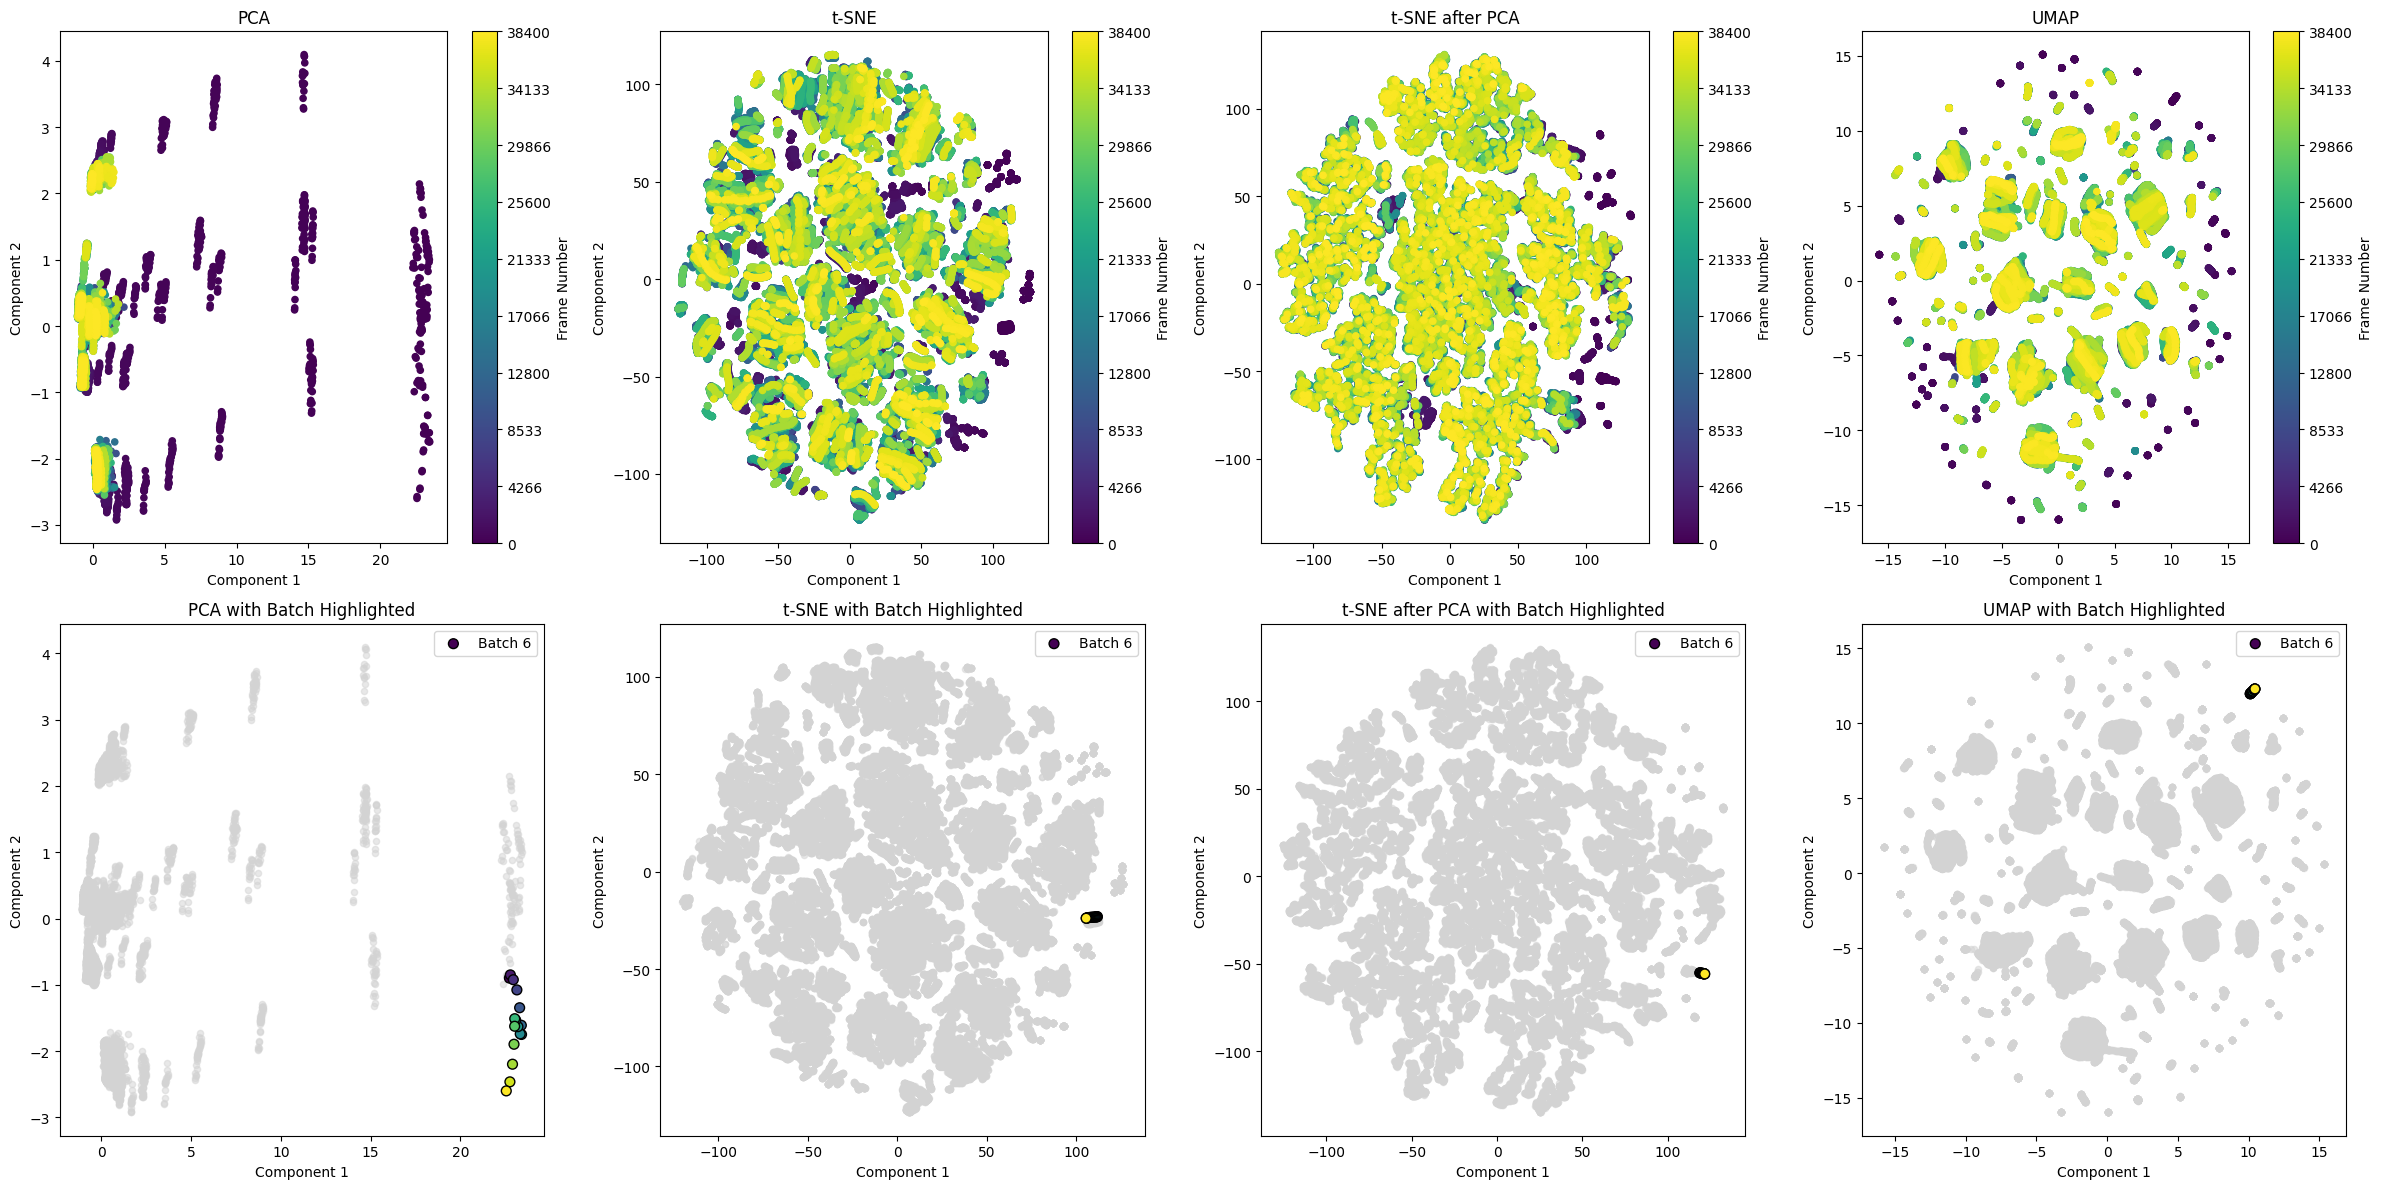

In [25]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Flatten the latent space for dimensionality reduction
n_epochs, n_time_steps, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_epochs * n_time_steps, n_features)

# Dimensionality reduction methods
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=0)
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Apply the methods
latent_pca = pca.fit_transform(latent_space_reshaped)
latent_tsne = tsne.fit_transform(latent_space_reshaped)
latent_tsne_pca = tsne.fit_transform(latent_pca)
latent_umap = umap_reducer.fit_transform(latent_space_reshaped)

# Create normalized frame numbers for the color mapping
frame_numbers = np.linspace(0, 1, n_epochs * n_time_steps)

# Highlight one specific batch
highlight_batch_index = 5  # for example, highlight the 6th batch
highlight_start = highlight_batch_index * n_time_steps
highlight_end = (highlight_batch_index + 1) * n_time_steps

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(24, 12))  # 2x4 grid with large figure size

# Define a function to plot each method
def plot_method(ax, method_data, title, highlight=False):
    if highlight:
        # Plot all points with a neutral color
        ax.scatter(method_data[:, 0], method_data[:, 1], color='lightgrey', s=20, alpha=0.5)
        # Highlight a specific batch
        ax.scatter(method_data[highlight_start:highlight_end, 0], method_data[highlight_start:highlight_end, 1], c=frame_numbers[highlight_start:highlight_end], cmap='viridis', s=50, edgecolor='black', label=f'Batch {highlight_batch_index+1}')
        ax.legend()
    else:
        # Plot all points with color gradient
        scatter = ax.scatter(method_data[:, 0], method_data[:, 1], c=frame_numbers, cmap='viridis', s=20)
        # Create a color bar
        colorbar_ticks = np.linspace(0, 1, 10)  # 10 evenly spaced ticks from 0 to 1
        colorbar_ticklabels = [f"{int(tick * (n_epochs * n_time_steps))}" for tick in colorbar_ticks]  # Scale ticks to frame numbers
        cbar = plt.colorbar(scatter, ax=ax, ticks=colorbar_ticks)
        cbar.ax.set_yticklabels(colorbar_ticklabels)
        cbar.set_label('Frame Number')
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

# Plot all samples with normal coloring
plot_method(axs[0, 0], latent_pca, 'PCA')
plot_method(axs[0, 1], latent_tsne, 't-SNE')
plot_method(axs[0, 2], latent_tsne_pca, 't-SNE after PCA')
plot_method(axs[0, 3], latent_umap, 'UMAP')

# Plot with one batch highlighted
plot_method(axs[1, 0], latent_pca, 'PCA with Batch Highlighted', highlight=True)
plot_method(axs[1, 1], latent_tsne, 't-SNE with Batch Highlighted', highlight=True)
plot_method(axs[1, 2], latent_tsne_pca, 't-SNE after PCA with Batch Highlighted', highlight=True)
plot_method(axs[1, 3], latent_umap, 'UMAP with Batch Highlighted', highlight=True)

# Adjust layout
plt.tight_layout()
plt.show()
